In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
from numpy.random import normal
np.random.seed(37)


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.exp(z)

[1.99996534 0.14999278 0.49976397 0.20017282]


<AxesSubplot:>

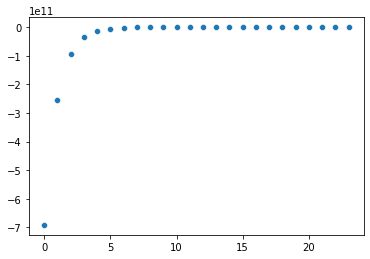

In [50]:
import _glm
import importlib
importlib.reload(_glm)
beta,llik = _glm.poissonr_optimizer(X,y,1000)
print(beta)
llik
sns.scatterplot(range(len(llik)),llik)


In [51]:
from sklearn import linear_model
clf = linear_model.PoissonRegressor(fit_intercept=True)
clf.fit(X, y)
clf.coef_,clf.intercept_


(array([0.13554465, 0.44964595, 0.17958408]), 2.0302357295140374)

In [52]:
from numpy.random import normal
from scipy.stats import bernoulli
np.random.seed(37)


M = 10000
X = np.hstack([
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1),
    normal(0.0, 1.0, M).reshape(M, 1)
])
z = np.dot(X, np.array([0.15, 0.5, 0.2])) + 2.0 + normal(0.0, 0.01, M)
y = np.array([ bernoulli.rvs(p) for p in 1/(1 + np.exp(-z))])

In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.coef_,clf.intercept_

(array([[0.09258814, 0.45523283, 0.19295505]]), array([2.02078226]))

[2.02096359 0.09268011 0.45568358 0.19314621]
[0.38466390472253204, 0.3685063647671678, 0.36774863250640477, 0.36774514901141425, 0.3677451489246439, 0.36774514892464394]


<AxesSubplot:>

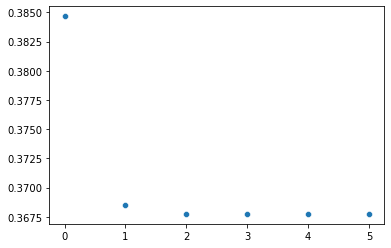

In [54]:
import _glm
import importlib
importlib.reload(_glm)
beta,llik = _glm.lr_optimizer(X,y,20)
print(beta)
print(llik)
sns.scatterplot(range(len(llik)),llik)

In [3]:
import numpy as np
import pandas as pd
from numpy.random import normal
np.random.seed(37)

df_w = pd.DataFrame([
[0.8,0.15,0.05],
[0.75,0.15,0.1],
[0.8,0.15,0.05],
[0.75,0.15,0.1],
[0.15,0.05,0.8],
[0.15,0.05,0.8],
[0.15,0.05,0.8],
[0.15,0.05,0.8],
[0.05,0.8,0.15],
[0.05,0.8,0.15],
[0.05,0.8,0.15],
[0.05,0.8,0.15],
])

print('W m x k',df_w.shape)

a = list(normal(5,1,100)) + list(normal(1,1,100)) + list(normal(1,1,100))
b = list(normal(1,1,100)) + list(normal(1,1,100)) + list(normal(5,1,100))
c = list(normal(1,1,100)) + list(normal(5,1,100)) + list(normal(1,1,100))
df_h = pd.DataFrame([a,b,c])

print('H k x n',df_h.shape)


df_y = pd.DataFrame(np.dot(df_w.to_numpy(),df_h.to_numpy()))
print('A m x n',df_y.shape)


W m x k (12, 3)
H k x n (3, 300)
A m x n (12, 300)


<AxesSubplot:>

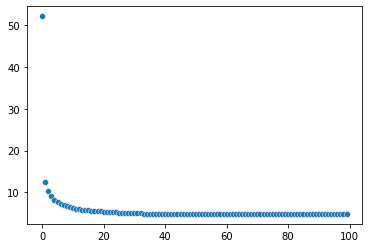

In [16]:
import numpy as np
import _nmf
import importlib
importlib.reload(_nmf)
model = _nmf.als_activeset(df_y.to_numpy(),3,100)
sns.scatterplot(range(len(model['loss'])),model['loss'])

In [11]:
from sklearn.decomposition import NMF
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform(np.exp(df_y.to_numpy()))
H = model.components_

<AxesSubplot:>

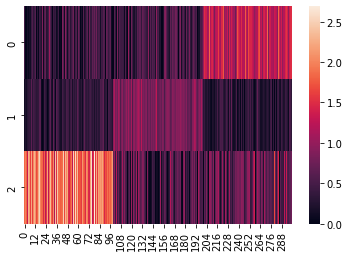

In [26]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(model['H'])

<AxesSubplot:>

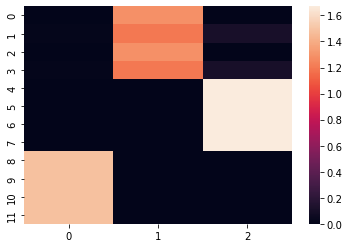

In [27]:
sns.heatmap(W)

TODO-  recheck code and test

### Alternative local Poisson approximation

Let $Y_{gb}$ be pseudobulk matrix.

$$\mathbb{E}\!\left[Y_{gb}\right] = \exp\left( \sum_{k} W_{gk} H_{bk} \right)$$

Let $\eta_{gb} = \sum_{k} W_{gk} H_{bk}$

$$\sum_{g,b} Y_{gb} \ln \eta_{gb} - \eta_{gb}$$


We can construct quadratic approximation from previous $\tilde{\eta}$

$\tilde{Y}_{gb} = Y_{gb} -1 + \tilde{\eta}_{gb} + \exp(-\tilde{\eta}_{gb})$

$\tilde{w}_{gb} = \exp(\tilde{\eta}_{gb})$

Solving for $H$ given $W$:
$$\sum_{g}\tilde{w}_{gb} \left( \tilde{Y}_{gb} - \sum_{k} W_{gk} H_{bk} \right)^{2}$$


$$H_{bk} \gets 
\frac{\sum_{g} \tilde{w}_{gb} (\tilde{Y} - \sum_{s \neq k} W_{gs} H_{bs}) W_{gk}}
     {\sum_{g} \tilde{w}_{gb} W_{gk}^{2}}$$

Solving for $W$ given $H$:

$$\sum_{b}\tilde{w}_{gb} \left( \tilde{Y}_{gb} - \sum_{k} H_{bk} W_{gk} \right)^{2}$$


$$W_{gk} \gets 
\frac{\sum_{b} \tilde{w}_{gb} (\tilde{Y}_{gb} - \sum_{s \neq k} H_{bs} W_{gs} )H_{bk} }
     {\sum_{b} \tilde{w}_{gb} H_{bk}^{2}}$$




In [ ]:
from numpy.random import normal 

y= np.matrix(df.to_numpy())
k = 10
g = y.shape[1]
b = y.shape[0]
W = np.matrix(normal(0.0, 1.0, g * k).reshape(g, k))
H = np.matrix(normal(0.0, 1.0, k * b).reshape(k, b))

w = np.exp(np.dot(W,H))
#update 
for iter in range(100):
    yhat = np.dot(W,H)
    
    for ki in range(k):

        yhat_k = np.dot(W[:,ki],H[ki,:])
        yhat_ex_k = yhat - yhat_k
        res = y.T - yhat_ex_k    
        res_gb = np.multiply(res,w)
        res_kb = np.dot(W[:,ki].T,res_gb)
        res_allk = np.dot(np.square(W[:,ki]).T,w)
        H[ki,:] =  res_kb / res_allk

    for ki in range(k):


        yhat_k = np.dot(W[:,ki],H[ki,:])
        yhat_ex_k = yhat - yhat_k
        res = y.T - yhat_ex_k
        res_gb = np.multiply(res,w)
        res_kg = np.dot(H[ki,:],res_gb.T)
        res_allk = np.dot(np.square(H[ki,:]),w.T)
        W[:,ki] =  (res_kg / res_allk).T
